In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
import statsmodels.api as sm

In [2]:
df_islander = pd.read_csv("Islander_data.csv")

In [3]:
df_islander.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [14]:
A_mean = df_islander[df_islander["Drug"] == "A"]["Diff"].mean()
S_mean = df_islander[df_islander["Drug"] == "S"]["Diff"].mean()
T_mean = df_islander[df_islander["Drug"] == "T"]["Diff"].mean()
overall_mean = df_islander["Diff"].mean()

In [38]:
len(df_islander["Drug"].unique())

3

In [32]:
SSTotal = np.sum((df_islander["Diff"] - overall_mean)**2)
SSTreat = df_islander[df_islander["Drug"] == "T"]["Diff"].count() * (T_mean - overall_mean)**2 + df_islander[df_islander["Drug"] == "A"]["Diff"].count() * (A_mean - overall_mean)**2 + df_islander[df_islander["Drug"] == "S"]["Diff"].count() * (S_mean - overall_mean)**2
SSError = np.sum((df_islander[df_islander["Drug"] == "T"]["Diff"] - T_mean)**2) + np.sum((df_islander[df_islander["Drug"] == "A"]["Diff"] - A_mean)**2) + np.sum((df_islander[df_islander["Drug"] == "S"]["Diff"] - S_mean)**2)

In [43]:
SS = np.array([SSTreat, SSError, SSTotal])
DF = np.array([len(df_islander["Drug"].unique()) - 1, df_islander.shape[0] - len(df_islander["Drug"].unique()), df_islander.shape[0] - 1])

In [44]:
SSTotal - SSTreat

18480.525755383926

In [47]:
print([SS, DF])

[array([ 4304.78515371, 18480.52575538, 22785.31090909]), array([  2, 195, 197])]


In [48]:
MS = SS/DF

In [49]:
F = MS[0]/MS[1]

In [50]:
F

22.711288522955336

In [79]:
P_value = 1 - f.cdf(F, DF[0], DF[1])

In [69]:
P_value

1.3592142966700749e-09

In [75]:
np.column_stack([SS, DF, MS, [F, 0, 0]])

array([[4.30478515e+03, 2.00000000e+00, 2.15239258e+03, 2.27112885e+01],
       [1.84805258e+04, 1.95000000e+02, 9.47719270e+01, 0.00000000e+00],
       [2.27853109e+04, 1.97000000e+02, 1.15661477e+02, 0.00000000e+00]])

<AxesSubplot:xlabel='Drug', ylabel='Diff'>

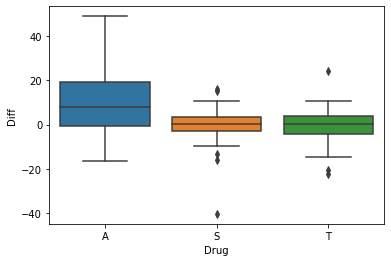

In [84]:
sns.boxplot(data=df_islander, x="Drug", y="Diff")

<AxesSubplot:title={'center':'Diff'}, xlabel='Drug'>

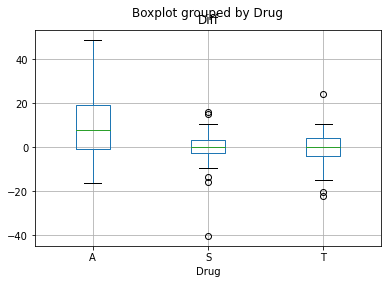

In [85]:
df_islander.boxplot(by = "Drug", column = ["Diff"]) 

In [89]:
#fig, ax = plt.subplots(dpi = 300)

sm.qqplot(df_islander["Diff"])
plt.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2366896381.py, line 2)

In [ ]:
percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)